In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
df=pd.read_excel('ensayos.xlsx',sheet_name=1,index_col=0, engine='openpyxl')
df.to_csv('test.csv')

In [9]:
df.head()

,Duplicado,Fase,Masa Total (g),Cantidad AC (g),Rendimiento,Pureza
Ensayo,,,,,,
Ensayo 1,1,Extracto,---,0.155571,---,---
Ensayo 1,1,Fase Orgánica,0.104,0.009500,6.10654,9.13462
Ensayo 1,1,Fase Acuosa,---,0.001000,0.642794,---
Ensayo 1,2,Extracto,---,0.167895,---,---
Ensayo 1,2,Fase Orgánica,0.185,0.013000,7.74296,7.02703


In [10]:
df.replace('---',np.nan,inplace=True)

In [11]:
df[['Masa Total (g)','Rendimiento','Pureza']]=df[['Masa Total (g)','Rendimiento','Pureza']].astype('float')

In [12]:
df=df.drop('Duplicado',axis=1)

In [13]:
# Propiedades del gráfico
plt.rcParams['figure.figsize'] = [5, 5]

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

In [14]:
# Definición de DataFrame 'data' que solo contiene lo que me interesa,
#  además se le eliminan las filas que tengan "Extracto" como fase, ya que no interesan para graficar
data=df.reset_index()[['Ensayo','Fase','Rendimiento','Pureza']]
for i, row in data.iterrows():
    if row['Fase'] == 'Extracto':
        data.drop(i,axis=0,inplace=True)  

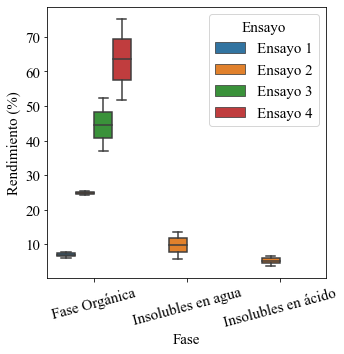

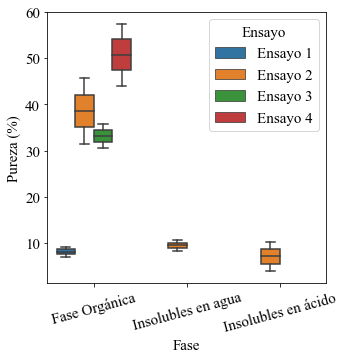

In [20]:
# Gráfico de los rendimientos y pureza según prueba y fase, para los gráficos de pureza se descartan las filas de Fase Acuosa ya que no corresponden

sns.boxplot(x='Fase',y='Rendimiento',data=data, hue='Ensayo')
plt.ylabel('Rendimiento (%)')
#plt.xlabel('\nFase')
plt.xticks(rotation=15)
plt.savefig('purificacion-rendimiento-vs-prueba.png',dpi=200)
plt.show()

for i, row in data.iterrows():
    if row['Fase'] == 'Fase Acuosa':
        data.drop(i,axis=0,inplace=True)   

sns.boxplot(x='Fase',y='Pureza',data=data, hue='Ensayo')
plt.ylabel('Pureza (%)')
#plt.xlabel('\nFase')
plt.xticks(rotation=15)
plt.savefig('purificacion-pureza-vs-prueba.png',dpi=200)
plt.show()

In [30]:
# Redondeo los valores de cantidad total de AC
# Agrupo la data por Prueba y Fase, redondeo a tres decimales y exporto a un Excel

df['Cantidad AC (g)']=np.round(df['Cantidad AC (g)'].astype('float'),3)
group=df[['Cantidad AC (g)','Fase','Rendimiento','Pureza']].reset_index().groupby(['Ensayo','Fase'])
group = np.round(group.agg([np.mean,np.std]),decimals=2)

In [31]:
means = pd.DataFrame(columns=[i for (i,y) in group.columns.to_list()[::2]])
for column in [i for (i,y) in group.columns.to_list()[::2]]:
    means[column] = (group[(column, 'mean')].astype('str') + ' ± '  +  group[(column, 'std')].astype('str'))

In [32]:
means.replace('nan ± nan', '---')

Cantidad AC (g)    Rendimiento         Pureza
Ensayo   Fase                                                             
Ensayo 1 Extracto                0.16 ± 0.01            ---            ---
         Fase Acuosa               0.0 ± 0.0    1.51 ± 1.23            ---
         Fase Orgánica            0.01 ± 0.0    6.92 ± 1.16    8.08 ± 1.49
Ensayo 2 Extracto                0.17 ± 0.03            ---            ---
         Fase Acuosa               0.0 ± 0.0    0.78 ± 0.01            ---
         Fase Orgánica           0.04 ± 0.01   24.79 ± 0.83  38.54 ± 10.03
         Insolubles en agua      0.02 ± 0.01    9.66 ± 5.66    9.44 ± 1.57
         Insolubles en ácido      0.01 ± 0.0     5.2 ± 2.12    7.06 ± 4.43
Ensayo 3 Extracto                0.26 ± 0.02            ---            ---
         Fase Acuosa              0.01 ± 0.0    2.51 ± 0.96            ---
         Fase Orgánica           0.12 ± 0.02  44.53 ± 10.84    33.15 ± 3.6
Ensayo 4 Extracto                0.97 ± 0.08            ---            ---
         Fase Acuosa              0.02 ± 0.0    2.07 ± 0.18            ---
         Fase Orgánica           0.62 ± 0.21  63.49 ± 16.59   50.73 ± 9.46

In [33]:
df.pivot_table(values=['Pureza','Rendimiento'], index=df.index,columns='Fase')

Pureza                                        Rendimiento  \
Fase     Fase Orgánica Insolubles en agua Insolubles en ácido Fase Acuosa   
Ensayo                                                                      
Ensayo 1      8.080821                NaN                 NaN    1.512621   
Ensayo 2     38.541340           9.443049               7.062    0.776546   
Ensayo 3     33.150442                NaN                 NaN    2.506034   
Ensayo 4     50.732342                NaN                 NaN    2.068309   

                                                               
Fase     Fase Orgánica Insolubles en agua Insolubles en ácido  
Ensayo                                                         
Ensayo 1      6.924751                NaN                 NaN  
Ensayo 2     24.787259            9.66385            5.200582  
Ensayo 3     44.526274                NaN                 NaN  
Ensayo 4     63.486522                NaN                 NaN

In [46]:
means.replace('nan ± nan', '---').to_csv('corrected.csv')